In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from skimage.filters import threshold_sauvola
import miscellaneous
import timeit # 測定執行時間
import cv2

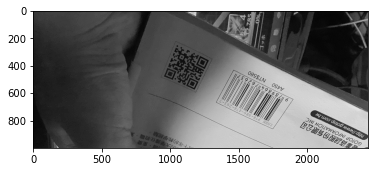

In [2]:
img = Image.open("./test_image.jpg")
img = ImageOps.grayscale(img)
img = np.asarray(img)
img = img[0:1000,:]
plt.imshow(img, cmap='gray');

In [3]:
img = np.asarray(img)
print("img.shape:",img.shape)

thres_sauvola = threshold_sauvola(image=img, window_size=25)# The Bradley threshold, 是 Niblack k=0 時候的特例。
# timeit.timeit(lambda: threshold_niblack(image=img, window_size=15, k=0),number=100) 測定執行效能

binary_sauvola = img > thres_sauvola

img.shape: (1000, 2448)


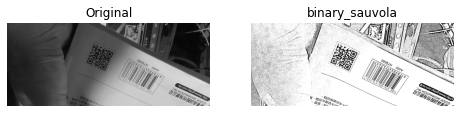

In [4]:
plt.figure(figsize=(8, 7))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray');
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('binary_sauvola')
plt.axis('off')

plt.show()

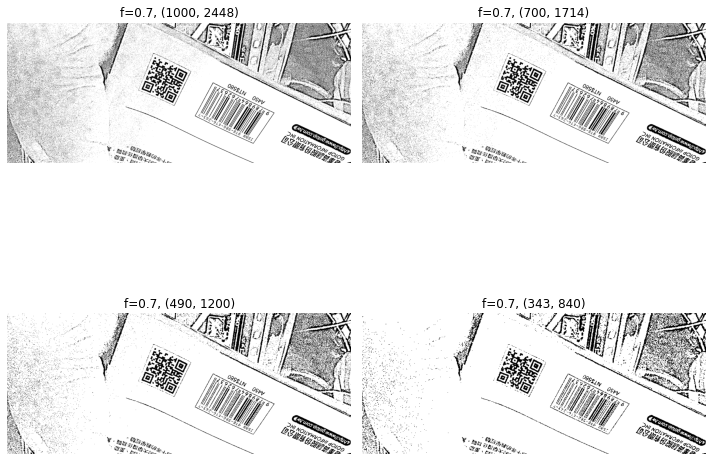

In [5]:
# 這邊的 img 
layer = np.asarray(binary_sauvola.copy(), dtype=np.uint8)

factor = 0.7

plt.figure(figsize=(10, 10))
for i in range(4): 
    plt.subplot(2, 2, i + 1) 
    
    
    plt.imshow(layer, plt.cm.gray) 
    plt.title('f={}'.format(factor)+', '+str(layer.shape))
    plt.axis('off')
    
    # using pyrDown() function 
    cols, rows = layer.shape[1::-1]
    #layer = cv2.pyrDown(layer, dstsize=( round(rows*0.7), round(cols*0.7) )) 
    layer = cv2.resize(layer, dsize=(round(cols*factor), round(rows*factor)), interpolation=cv2.INTER_AREA)# dsize=(w,h)
    
plt.tight_layout()  
plt.show()

In [6]:
def eat_image_2_pyramid(img: np.ndarray, threshold_window_size=25, pyramid_factor=0.7, number_of_layer = 4):
    """
    img : 原圖
    
    ... 剩下參數自己猜
    
    rtn : list of ndarray
    """
    #### rename area
    factor = pyramid_factor
    window_size = threshold_window_size
    ####
    
    img = Image.fromarray(img)
    img = ImageOps.grayscale(img)
    img = np.asarray(img)
    thres_sauvola = threshold_sauvola(image=img, window_size=25) # 計算出 threshold(float)
    binary_sauvola = img > thres_sauvola # "二值化"(return is "boolean mask")
    layer = np.asarray(binary_sauvola, dtype=np.uint8) # boolean -> uint8
    rtn = []
    for i in range(number_of_layer):
        # using pyrDown() function 
        rtn.append(layer)
        cols, rows = layer.shape[1::-1]
        layer = cv2.resize(layer, dsize=(round(cols*factor), round(rows*factor)), interpolation=cv2.INTER_AREA)
    return rtn

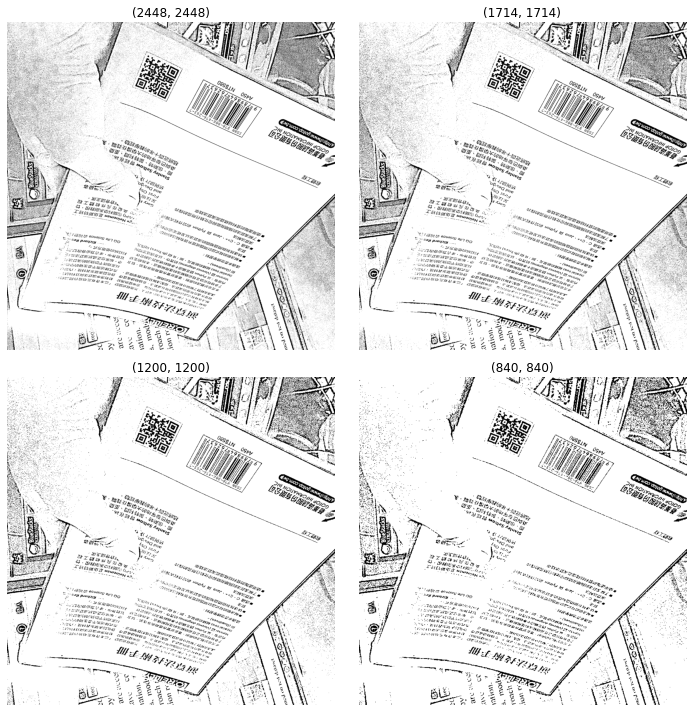

In [7]:
im = np.asarray(Image.open("./test_image.jpg"))

GETODAZE = miscellaneous.eat_image_2_pyramid(im)

plt.figure(figsize=(10, 10))

for i in range(4): 
    plt.subplot(2, 2, i + 1) 
    plt.imshow(GETODAZE[i], plt.cm.gray) 
    plt.title(str(GETODAZE[i].shape))
    plt.axis('off')

plt.tight_layout()  
plt.show()